In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

# Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [5]:
data=pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

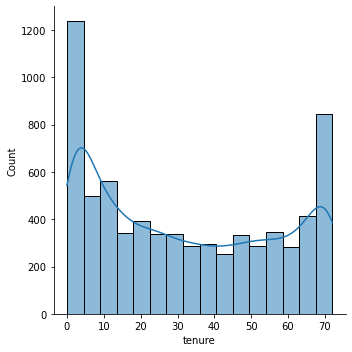

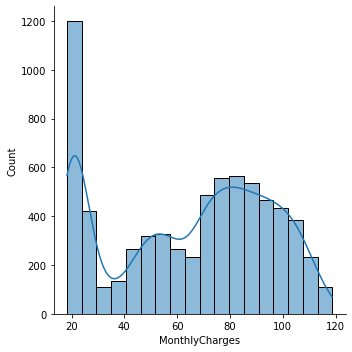

In [20]:
sns.displot(data['tenure'], kde=True)
sns.displot(data['MonthlyCharges'], kde=True)
plt.show()

In [21]:
data = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [22]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# dont need just want to see for fun 

In [ ]:
# little trick to not show the upper triangle correlations and centerline self correlations
# ax = sns.heatmap(corr_matrix, mask = np.triu(np.ones_like(corr_matrix, dtype=bool)), annot=True)

In [ ]:
# churn = target 
# senior citizen = label?encode or make an object
# tenure/monthlycharges = scale

# splitting

In [ ]:
# data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)
# unnecessary 

In [ ]:
data.dtypes

In [23]:
def convert(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [24]:
# X/y split
X = data.drop('Churn',axis = 1) #setting features 
y = data['Churn'] #setting target 
y = y.apply(convert)

In [25]:
# here we start scaling, so need to do train-test-split before

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

# scaling/encoding 

In [26]:
#categorical features and numerical ones are going to be treated differently #have to split bc need diff treatments 
X_num = X.select_dtypes(include = np.number) #all numerical features go here
X_cat = X.select_dtypes(include = object) #all categorical features go here 

In [27]:
X_num

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [28]:
y_train


5187    0
4765    0
4146    1
1622    0
904     0
       ..
3239    0
1256    0
860     0
189     0
3223    0
Name: Churn, Length: 5282, dtype: int64

In [30]:
# X_train numerical minmax scaling
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train)
X_norm = transformer.transform(X_train)

X_train_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_train_scale

,tenure,SeniorCitizen,MonthlyCharges
0,0.569444,1.0,0.857214
1,0.513889,0.0,0.174627
2,0.486111,0.0,0.566667
3,0.638889,0.0,0.520896
4,0.930556,0.0,0.627861
...,...,...,...
5277,0.222222,0.0,0.310448
5278,1.000000,0.0,0.673134
5279,0.361111,0.0,0.015423
5280,0.555556,0.0,0.381592


In [31]:
# X_test numerical minmax scaling
transformer = MinMaxScaler().fit(X_test)
X_norm2 = transformer.transform(X_test)

X_test_scale = pd.DataFrame(X_norm2, columns=X_num.columns)
X_test_scale

,tenure,SeniorCitizen,MonthlyCharges
0,0.013889,0.0,0.258829
1,0.138889,0.0,0.476287
2,0.125000,0.0,0.016650
3,0.986111,0.0,0.060040
4,0.208333,0.0,0.202825
...,...,...,...
1756,0.430556,0.0,0.017154
1757,1.000000,0.0,0.614026
1758,0.041667,0.0,0.268920
1759,0.013889,0.0,0.362765


In [32]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True) 

In [33]:
traindata = pd.concat([X_train_scale, y_train],axis=1)
traindata

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.569444,1.0,0.857214,0
1,0.513889,0.0,0.174627,0
2,0.486111,0.0,0.566667,1
3,0.638889,0.0,0.520896,0
4,0.930556,0.0,0.627861,0
...,...,...,...,...
5277,0.222222,0.0,0.310448,0
5278,1.000000,0.0,0.673134,0
5279,0.361111,0.0,0.015423,0
5280,0.555556,0.0,0.381592,0


In [34]:
test_data = pd.concat([X_test_scale, y_test],axis=1)
test_data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.013889,0.0,0.258829,1
1,0.138889,0.0,0.476287,0
2,0.125000,0.0,0.016650,0
3,0.986111,0.0,0.060040,0
4,0.208333,0.0,0.202825,0
...,...,...,...,...
1756,0.430556,0.0,0.017154,0
1757,1.000000,0.0,0.614026,0
1758,0.041667,0.0,0.268920,1
1759,0.013889,0.0,0.362765,0


# Modelo

In [37]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scale, y_train)
LR.score(X_test_scale, y_test)

0.7893242475865985

In [38]:
pred = LR.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6407185628742516
recall:  0.46021505376344085
f1:  0.5356695869837297


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1176,  120],
       [ 251,  214]])

<AxesSubplot:>

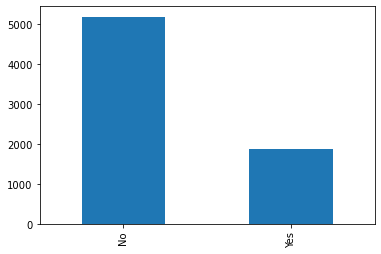

In [29]:
count_classes = data['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [40]:
traindata['Churn'].value_counts()

0    3878
1    1404
Name: Churn, dtype: int64

In [41]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# over sample

In [45]:
from sklearn.utils import resample

In [42]:
nochurn = traindata[traindata['Churn']==0]
yeschurn = traindata[traindata['Churn']==1]

In [44]:
display(nochurn.shape)
display(yeschurn.shape)

(3878, 4)

(1404, 4)

In [47]:
yeschurnover = resample(yeschurn, replace=True, n_samples = len(nochurn))

In [48]:
display(nochurn.shape)
display(yeschurnover.shape)
yeschurnover.head(10)

(3878, 4)

(3878, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn
1466,0.333333,0.0,0.568657,1
405,0.013889,0.0,0.514925,1
2329,0.541667,0.0,0.618905,1
2526,0.583333,0.0,0.594030,1
3564,0.236111,1.0,0.705473,1
4115,0.652778,0.0,0.806965,1
3238,0.069444,0.0,0.573632,1
2726,0.513889,0.0,0.102985,1
1918,0.013889,0.0,0.051741,1
4483,0.763889,0.0,0.854726,1


In [52]:
trainoversample = pd.concat([nochurn,yeschurnover], axis=0)
trainoversample.head()
trainoversample.shape

(7756, 4)

In [50]:
ytrainoversample = trainoversample['Churn'].copy()
xtrainoversample = trainoversample.drop('Churn',axis=1).copy()

In [51]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(xtrainoversample, ytrainoversample)
pred = LR_over.predict(X_train_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [1761, 5282]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

# UNDERSAMPLE

In [57]:
nochurnunder = resample(nochurn,replace=False,n_samples=len(yeschurn))

In [58]:
display(yeschurn.shape)
display(nochurnunder.shape)

(1404, 4)

(1404, 4)

In [59]:
trainunder = pd.concat([yeschurn,nochurnunder],axis=0)
trainunder

,tenure,SeniorCitizen,MonthlyCharges,Churn
2,0.486111,0.0,0.566667,1
8,0.013889,0.0,0.010448,1
11,0.166667,0.0,0.774129,1
12,0.194444,0.0,0.279602,1
14,0.472222,0.0,0.813930,1
...,...,...,...,...
3570,1.000000,0.0,0.981095,0
5267,0.986111,0.0,0.880597,0
2300,0.166667,0.0,0.266667,0
3574,0.750000,0.0,0.764677,0


In [62]:
ytrainunder = trainunder['Churn'].copy()
xtrainunder = trainunder.drop(['Churn'],axis = 1).copy()

In [63]:
LR_under = LogisticRegression(random_state=0, solver='lbfgs')
LR_under.fit(xtrainunder, ytrainunder)
pred = LR_over.predict(X_train_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [1761, 5282]

# smote

In [54]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scale,y_train)

In [55]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scale)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.49633967789165445
recall:  0.7290322580645161
f1:  0.5905923344947734


In [56]:
confusion_matrix(y_test,pred)

array([[952, 344],
       [126, 339]])